In [1]:
import pandas as pd
import string
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
crime=pd.read_csv('Crime_and_Safety__2015__data.csv')

In [3]:
vacant=pd.read_csv('vacanthome1.csv')

In [4]:
crime

,the_geom,OBJECTID,Community Statistical Areas (CSAs),"Part 1 Crime Rate per 1,000 Residents","Violent Crime Rate per 1,000 Residents","Property Crime Rate per 1,000 Residents","Juvenile Arrest Rate per 1,000 Juveniles","Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles","Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles","Rate of 911 Calls for Service for Shootings per 1,000 Residents","Rate of Gun Homicides per 10,000 Residents","Rate of 911 Calls for Service for Common Assaults per 1,000 Residents","Rate of 911 Calls for Service for Narcotics per 1,000 Residents","Rate of 911 Calls for Service for Auto Accidents per 1,000 Residents","Adult Arrest Rate per 1,000 Adults",Shape__Area,Shape__Length
0,MULTIPOLYGON (((-76.598249582828 39.3541564623...,20,Greater Govans,48.965453,11.328527,37.262429,17.316017,2.597403,4.329004,3.183223,0.748994,66.473177,81.546672,47.841962,32.581764,2.269850e+07,22982.125715
1,MULTIPOLYGON (((-76.52969396034 39.35653169125...,24,Hamilton,47.531149,9.460083,37.148131,8.666667,0.666667,0.000000,1.461314,0.153822,44.839255,22.458083,46.069835,17.168675,4.519110e+07,27712.111092
2,MULTIPOLYGON (((-76.573052627685 39.3539091042...,37,Northwood,42.300066,10.514931,30.583428,16.818500,4.905396,0.000000,1.021450,0.120171,32.866671,19.527729,53.055339,9.604106,5.274327e+07,38889.894591
3,MULTIPOLYGON (((-76.638802781968 39.3069621725...,43,Sandtown-Winchester/Harlem Park,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,2.367209e+07,20987.143306
4,MULTIPOLYGON (((-76.677916539956 39.3400168652...,13,Dorchester/Ashburton,50.313932,12.557271,36.738503,10.933558,2.523129,2.523129,2.630239,0.593925,55.913796,23.502461,50.229085,13.747564,3.411828e+07,27136.075712
5,MULTIPOLYGON (((-76.682968511607 39.3413341519...,27,Howard Park/West Arlington,48.468684,10.944542,37.064288,13.011152,3.717472,1.858736,1.655477,0.459855,42.214660,26.119746,79.095006,11.133016,6.326243e+07,36034.498543
6,MULTIPOLYGON (((-76.584490179362 39.3149148861...,10,Clifton-Berea,66.538384,23.698602,41.219364,29.668412,1.745201,6.980803,6.380393,0.810209,101.276079,140.976301,79.096617,81.566069,2.328523e+07,24022.764621
7,MULTIPOLYGON (((-76.569411446105 39.2924907712...,39,Patterson Park North & East,93.064815,18.764176,72.719775,56.903766,25.104603,2.510460,1.443398,0.206200,66.327583,34.366623,52.924600,29.344175,1.450764e+07,21786.374660
8,MULTIPOLYGON (((-76.609887581086 39.3555008577...,36,North Baltimore/Guilford/Homeland,38.250115,4.466331,33.612002,11.022044,3.006012,1.002004,0.171782,0.000000,18.208887,11.108566,32.638571,8.619529,7.492399e+07,42904.222144
9,MULTIPOLYGON (((-76.625886149546 39.2671883622...,44,South Baltimore,41.835779,3.278177,38.089291,16.129032,5.376344,0.000000,0.156104,0.000000,28.098658,14.205432,60.099906,10.123931,4.635394e+07,68440.028069


In [5]:
crime.isna().any()

the_geom                                                                 False
OBJECTID                                                                 False
Community Statistical Areas (CSAs)                                       False
Part 1 Crime Rate per 1,000 Residents                                    False
Violent Crime Rate per 1,000 Residents                                   False
Property Crime Rate per 1,000 Residents                                  False
Juvenile Arrest Rate per 1,000 Juveniles                                 False
Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles            False
Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles               False
Rate of 911 Calls for Service for Shootings per 1,000 Residents          False
Rate of Gun Homicides per 10,000 Residents                               False
Rate of 911 Calls for Service for Common Assaults per 1,000 Residents    False
Rate of 911 Calls for Service for Narcotics per 1,00

In [6]:
crime.rename(columns={'Part 1 Crime Rate per 1,000 Residents': 'CrimeRate'}, inplace=True)
crime.rename(columns={'Violent Crime Rate per 1,000 Residents': 'ViolentCrimeRate'}, inplace=True)
crime.rename(columns={'Property Crime Rate per 1,000 Residents': 'PropertyCrimeRate'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate per 1,000 Juveniles': 'JuvenileArrestRate'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles': 'JuvenileViolentOffenses'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles': 'JuvenileDrugOffenses'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Shootings per 1,000 Residents': '911Shootings'}, inplace=True)
crime.rename(columns={'Rate of Gun Homicides per 10,000 Residents': 'GunHomicides'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Common Assaults per 1,000 Residents': '911CommonAssaults'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Narcotics per 1,000 Residents': '911Narcotics'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Auto Accidents per 1,000 Residents': '911AutoAccidents'}, inplace=True)
crime.rename(columns={'Adult Arrest Rate per 1,000 Adults': 'AdultArrestRate'}, inplace=True)

In [7]:
crime.drop(['the_geom', 'OBJECTID', 'Shape__Area', 'Shape__Length'],axis=1, inplace=True)

In [8]:
crime.head()

,Community Statistical Areas (CSAs),CrimeRate,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate
0,Greater Govans,48.965453,11.328527,37.262429,17.316017,2.597403,4.329004,3.183223,0.748994,66.473177,81.546672,47.841962,32.581764
1,Hamilton,47.531149,9.460083,37.148131,8.666667,0.666667,0.000000,1.461314,0.153822,44.839255,22.458083,46.069835,17.168675
2,Northwood,42.300066,10.514931,30.583428,16.818500,4.905396,0.000000,1.021450,0.120171,32.866671,19.527729,53.055339,9.604106
3,Sandtown-Winchester/Harlem Park,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452
4,Dorchester/Ashburton,50.313932,12.557271,36.738503,10.933558,2.523129,2.523129,2.630239,0.593925,55.913796,23.502461,50.229085,13.747564


In [9]:
crime.isna().any()

Community Statistical Areas (CSAs)    False
CrimeRate                             False
ViolentCrimeRate                      False
PropertyCrimeRate                     False
JuvenileArrestRate                    False
JuvenileViolentOffenses               False
JuvenileDrugOffenses                  False
911Shootings                          False
GunHomicides                          False
911CommonAssaults                     False
911Narcotics                          False
911AutoAccidents                      False
AdultArrestRate                       False
dtype: bool

In [10]:
crime.head()

,Community Statistical Areas (CSAs),CrimeRate,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate
0,Greater Govans,48.965453,11.328527,37.262429,17.316017,2.597403,4.329004,3.183223,0.748994,66.473177,81.546672,47.841962,32.581764
1,Hamilton,47.531149,9.460083,37.148131,8.666667,0.666667,0.000000,1.461314,0.153822,44.839255,22.458083,46.069835,17.168675
2,Northwood,42.300066,10.514931,30.583428,16.818500,4.905396,0.000000,1.021450,0.120171,32.866671,19.527729,53.055339,9.604106
3,Sandtown-Winchester/Harlem Park,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452
4,Dorchester/Ashburton,50.313932,12.557271,36.738503,10.933558,2.523129,2.523129,2.630239,0.593925,55.913796,23.502461,50.229085,13.747564


In [11]:
c = crime['Community Statistical Areas (CSAs)'].str.split('/').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
c.name = 'Neighborhood'
del crime['Community Statistical Areas (CSAs)']
crime = crime.join(c)
crime=crime.reset_index()
del crime['index']

In [12]:
crime['Neighborhood'] = crime['Neighborhood'].str.lower()

In [13]:
crime.head()

,CrimeRate,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate,Neighborhood
0,48.965453,11.328527,37.262429,17.316017,2.597403,4.329004,3.183223,0.748994,66.473177,81.546672,47.841962,32.581764,greater govans
1,47.531149,9.460083,37.148131,8.666667,0.666667,0.000000,1.461314,0.153822,44.839255,22.458083,46.069835,17.168675,hamilton
2,42.300066,10.514931,30.583428,16.818500,4.905396,0.000000,1.021450,0.120171,32.866671,19.527729,53.055339,9.604106,northwood
3,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester
4,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,harlem park


In [14]:
crime.shape[0]

96

In [15]:
vacant['Neighborhood'].value_counts()

BROADWAY EAST                      749
CARROLLTON RIDGE                   515
SANDTOWN-WINCHESTER                481
HARLEM PARK                        453
CENTRAL PARK HEIGHTS               367
MIDTOWN-EDMONDSON                  334
OLIVER                             312
EAST BALTIMORE MIDWAY              264
UPTON                              260
PENROSE/FAYETTE STREET OUTREACH    255
FRANKLIN SQUARE                    228
SHIPLEY HILL                       213
Coldstream Homestead Montebello    211
PENN NORTH                         209
MONDAWMIN                          184
NEW SOUTHWEST/MOUNT CLARE          175
MOSHER                             139
PARK CIRCLE                        133
MIDDLE EAST                        128
NORTHWEST COMMUNITY ACTION         126
BOYD-BOOTH                         125
JOHNSTON SQUARE                    124
DRUID HEIGHTS                      115
COPPIN HEIGHTS/ASH-CO-EAST         114
FRANKLINTOWN ROAD                  109
GREENSPRING              

In [16]:
vacant.drop(['ReferenceID','Block','Lot','NoticeDate'],axis=1, inplace=True)

In [17]:
vacant['Neighborhood'] = vacant['Neighborhood'].str.lower()

In [18]:
vacant

,BuildingAddress,Neighborhood,PoliceDistrict,CouncilDistrict,Latitude,Longitude
0,1945 W NORTH AVE,easterwood,WESTERN,7,39.309473,-76.649536
1,1947 W NORTH AVE,easterwood,WESTERN,7,39.309470,-76.649585
2,1949 W NORTH AVE,easterwood,WESTERN,7,39.309468,-76.649634
3,1807 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309628,-76.646765
4,1809 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309626,-76.646816
5,1811 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309623,-76.646866
6,1821 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309615,-76.647117
7,1827 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309585,-76.647336
8,1831 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309578,-76.647439
9,1833 W NORTH AVE,sandtown-winchester,WESTERN,7,39.309578,-76.647489


In [19]:
vacant.isna().any()

BuildingAddress    False
Neighborhood       False
PoliceDistrict     False
CouncilDistrict    False
Latitude           False
Longitude          False
dtype: bool

In [20]:
final = pd.merge(crime, vacant, on = 'Neighborhood')
final
final 

,CrimeRate,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate,Neighborhood,BuildingAddress,PoliceDistrict,CouncilDistrict,Latitude,Longitude
0,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1807 W NORTH AVE,WESTERN,7,39.309628,-76.646765
1,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1809 W NORTH AVE,WESTERN,7,39.309626,-76.646816
2,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1811 W NORTH AVE,WESTERN,7,39.309623,-76.646866
3,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1821 W NORTH AVE,WESTERN,7,39.309615,-76.647117
4,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1827 W NORTH AVE,WESTERN,7,39.309585,-76.647336
5,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1831 W NORTH AVE,WESTERN,7,39.309578,-76.647439
6,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1833 W NORTH AVE,WESTERN,7,39.309578,-76.647489
7,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1835 W NORTH AVE,WESTERN,7,39.309572,-76.647540
8,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1837 W NORTH AVE,WESTERN,7,39.309571,-76.647589
9,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,sandtown-winchester,1851 W NORTH AVE,WESTERN,7,39.309548,-76.647950


In [22]:
'''import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('t.txt', delim_whitespace=True, header=None, parse_dates={'Dates': [1, 2]})

plt.figure()
l_h = []
for identifier in df[0].unique():
    h, = plt.plot(df[df[0]==identifier]['Dates'], df[df[0]==identifier][3], label=identifier)
    l_h.append(h)
plt.legend(handles=l_h)
plt.show()'''


"import matplotlib.pyplot as plt\nimport pandas as pd\n\ndf = pd.read_csv('t.txt', delim_whitespace=True, header=None, parse_dates={'Dates': [1, 2]})\n\nplt.figure()\nl_h = []\nfor identifier in df[0].unique():\n    h, = plt.plot(df[df[0]==identifier]['Dates'], df[df[0]==identifier][3], label=identifier)\n    l_h.append(h)\nplt.legend(handles=l_h)\nplt.show()"

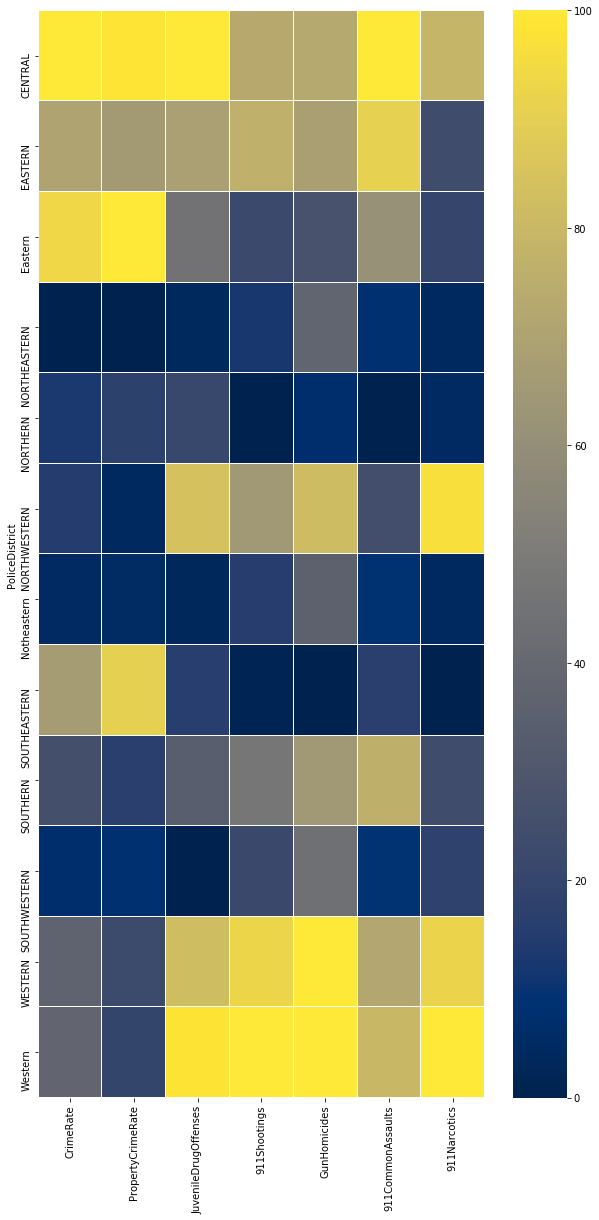

In [23]:
neighbor_heatmap = final[['PoliceDistrict', 'CrimeRate',
       'PropertyCrimeRate',        'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics']]

neighbor_heatmap = neighbor_heatmap.groupby('PoliceDistrict').mean()

neighbor_heatmap_cpy = neighbor_heatmap.copy()

col_names2 = ['CrimeRate',
       'PropertyCrimeRate',        'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics']

features2 = neighbor_heatmap[col_names2]

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))

scaler2 = min_max_scaler.fit(features2)

features2=scaler2.transform(features2)

neighbor_heatmap_cpy[col_names2]= features2

fig, ax = plt.subplots(figsize=(10,20)) 

sns.heatmap(neighbor_heatmap_cpy, cmap='cividis', linewidths=0.05,ax=ax)

plt.show()

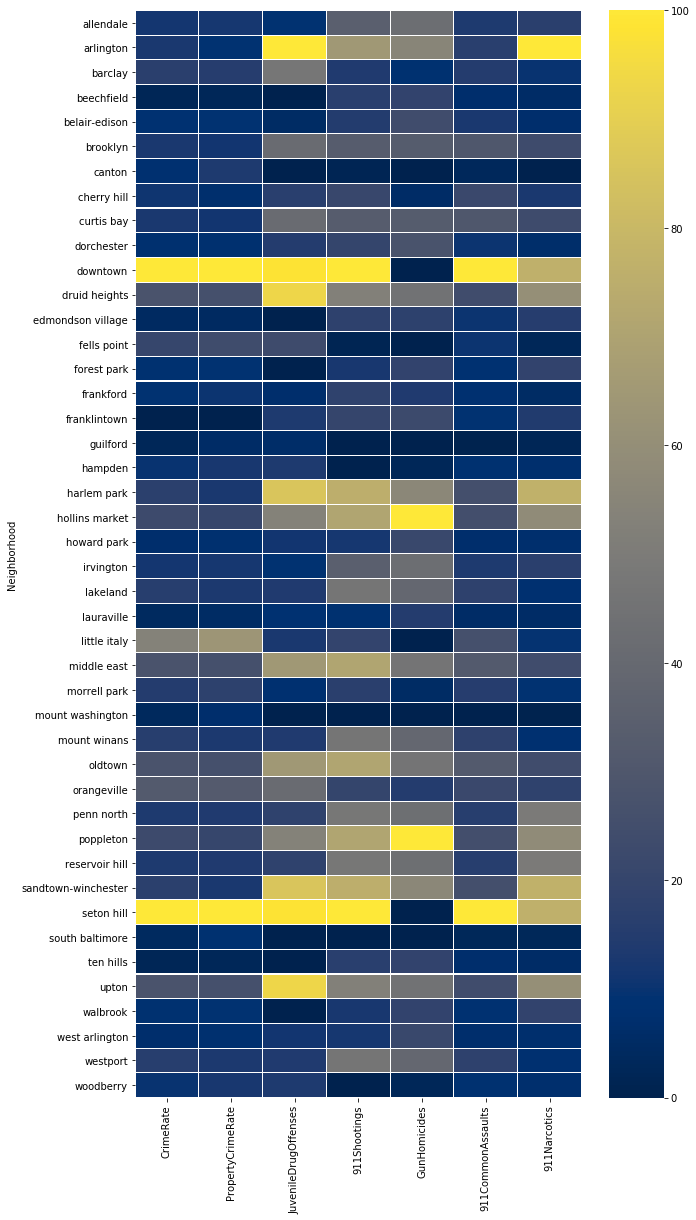

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

neighbor_heatmap = final[['Neighborhood', 'CrimeRate',
       'PropertyCrimeRate',        'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics']]

neighbor_heatmap = neighbor_heatmap.groupby('Neighborhood').mean()

neighbor_heatmap_cpy = neighbor_heatmap.copy()

col_names2 = ['CrimeRate',
       'PropertyCrimeRate',        'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics']

features2 = neighbor_heatmap[col_names2]

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))

scaler2 = min_max_scaler.fit(features2)

features2=scaler2.transform(features2)

neighbor_heatmap_cpy[col_names2]= features2

fig, ax = plt.subplots(figsize=(10,20)) 

sns.heatmap(neighbor_heatmap_cpy, cmap='cividis', linewidths=0.05,ax=ax)

plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [26]:
final['Neighborhood'] = LE.fit_transform(final['Neighborhood'])
final['PoliceDistrict'] = LE.fit_transform(final['PoliceDistrict'])
final['BuildingAddress'] = LE.fit_transform(final['BuildingAddress'])

In [27]:
final.head()

,CrimeRate,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate,Neighborhood,BuildingAddress,PoliceDistrict,CouncilDistrict,Latitude,Longitude
0,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,826,10,7,39.309628,-76.646765
1,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,836,10,7,39.309626,-76.646816
2,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,847,10,7,39.309623,-76.646866
3,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,886,10,7,39.309615,-76.647117
4,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,902,10,7,39.309585,-76.647336


In [28]:
from sklearn.model_selection import train_test_split
x = final.drop(['CrimeRate'],axis=1)
y = final['CrimeRate']

In [29]:
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
lm = linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
predictions=lm.predict(x_train)

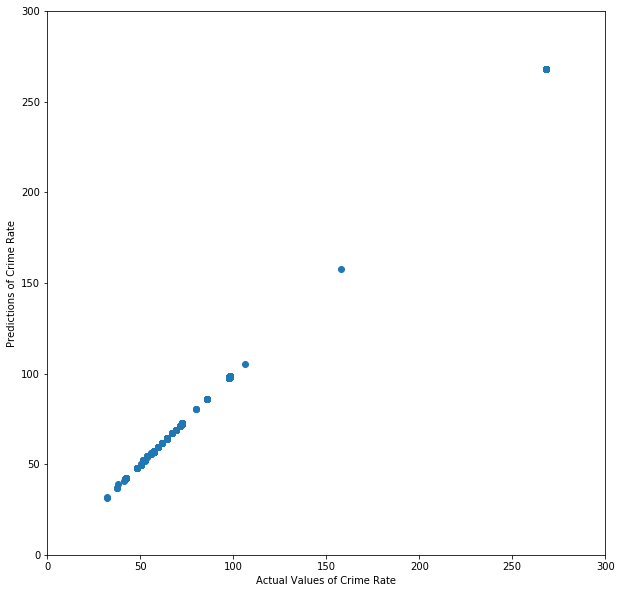

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train, predictions)
plt.xlabel('Actual Values of Crime Rate')
plt.ylabel('Predictions of Crime Rate')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

In [31]:
import numpy as np
from sklearn import metrics
rms=np.sqrt(metrics.mean_squared_error(y_train, predictions))

In [32]:
rms

0.13086185933064995

In [33]:
errors = abs(predictions - y_train)
mape = 100 * (errors / y_train)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.87 %.


In [38]:
x_train[0:5]

,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate,Neighborhood,BuildingAddress,PoliceDistrict,CouncilDistrict,Latitude,Longitude
275,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,35,375,10,9,39.299836,-76.639660
2107,18.746051,42.266376,23.809524,5.602241,7.002801,4.282806,0.702099,132.415924,70.490767,69.367409,55.490196,8,442,8,10,39.224625,-76.590289
1406,14.056225,52.543507,35.519126,16.393443,1.366120,2.231147,0.111557,76.639893,31.012941,106.314145,17.169759,27,1233,9,10,39.268574,-76.649981
360,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,35,665,10,7,39.307626,-76.645976
1711,30.264939,66.718236,71.992976,14.925373,15.803336,6.768517,0.966931,109.649971,175.401276,74.453684,69.323144,39,2146,0,11,39.296348,-76.631368


In [39]:
y_train[0:5]

275     72.435553
2107    61.644317
1406    67.045962
360     72.435553
1711    98.336879
Name: CrimeRate, dtype: float64

In [40]:
predictions[0:5].tolist()

[72.4553458293416,
 61.63029975502762,
 67.37324848098874,
 72.40258274909624,
 98.27466457270418]

/Users/NavyaMingu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/NavyaMingu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


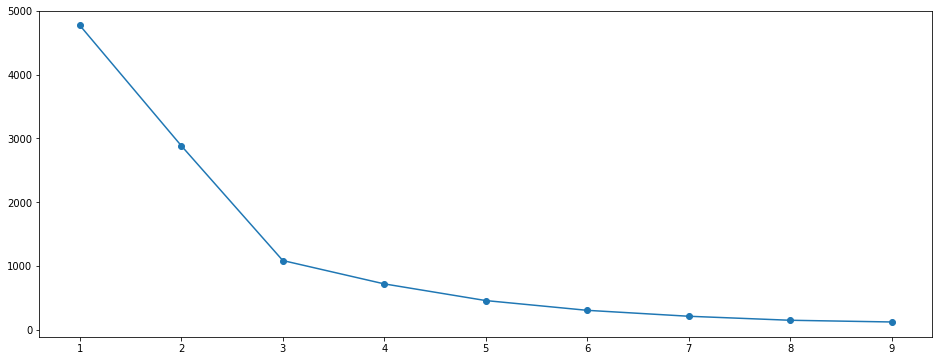

In [41]:
from sklearn.cluster import KMeans
X = final[['CrimeRate', 'Neighborhood']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

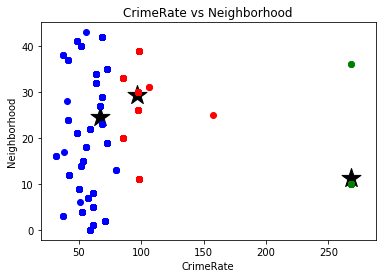

In [42]:
plt.plot()
x1=final['CrimeRate']
x2=final['Neighborhood']
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['blue', 'green', 'red']

kmeans_model = KMeans(n_clusters=3).fit(X)
centers = np.array(kmeans_model.cluster_centers_)

plt.title('CrimeRate vs Neighborhood')
plt.xlabel('CrimeRate')
plt.ylabel('Neighborhood')


for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker= 'o')

plt.scatter(centers[:,0],centers[:,1], marker='*', color='black', s=400)    

plt.show()

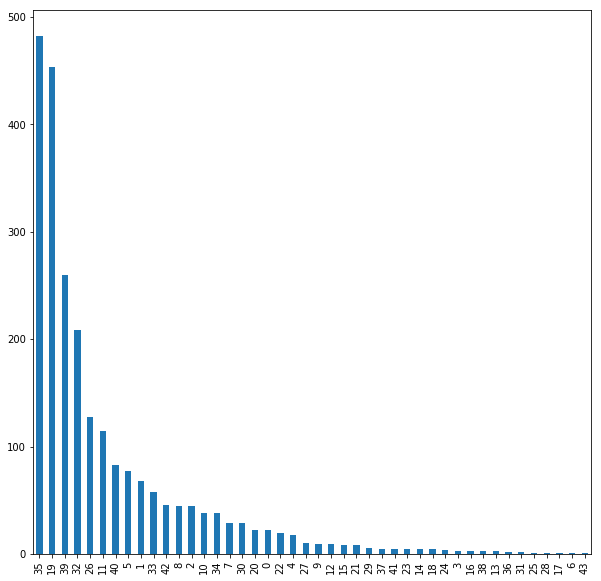

In [43]:
final['Neighborhood'].value_counts().plot(kind='bar',figsize=(10, 10))

In [44]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
#
rfr = RandomForestRegressor(n_estimators=100, )
rfc = RandomForestClassifier(n_estimators=100)

In [45]:
final.head()

,CrimeRate,ViolentCrimeRate,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate,Neighborhood,BuildingAddress,PoliceDistrict,CouncilDistrict,Latitude,Longitude
0,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,826,10,7,39.309628,-76.646765
1,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,836,10,7,39.309626,-76.646816
2,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,847,10,7,39.309623,-76.646866
3,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,886,10,7,39.309615,-76.647117
4,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.79753,76.194952,72.268452,35,902,10,7,39.309585,-76.647336


In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/NavyaMingu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/NavyaMingu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/NavyaMingu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [47]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor = regressor.fit(y_train, x_train)
y_pred = regressor.predict(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[72.435555 61.644318 67.04596  ... 69.11083  97.79463  72.435555].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
def max_value(y_train):
    return max([sublist[-1] for sublist in x_train])

a = max_value(y_train)

In [49]:
def min_value(y_train):
    return min([sublist[-1] for sublist in x_train])

b = min_value(y_train)

In [50]:
X_grid = np.arange(b, a, 0.01)
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   


In [51]:
X_grid = X_grid.reshape((len(X_grid), 1)) 
X_grid

array([[-3.26391331e+00],
       [-3.25391331e+00],
       [-3.24391331e+00],
       [-3.23391331e+00],
       [-3.22391331e+00],
       [-3.21391331e+00],
       [-3.20391331e+00],
       [-3.19391331e+00],
       [-3.18391331e+00],
       [-3.17391331e+00],
       [-3.16391331e+00],
       [-3.15391331e+00],
       [-3.14391331e+00],
       [-3.13391331e+00],
       [-3.12391331e+00],
       [-3.11391331e+00],
       [-3.10391331e+00],
       [-3.09391331e+00],
       [-3.08391331e+00],
       [-3.07391331e+00],
       [-3.06391331e+00],
       [-3.05391331e+00],
       [-3.04391331e+00],
       [-3.03391331e+00],
       [-3.02391331e+00],
       [-3.01391331e+00],
       [-3.00391331e+00],
       [-2.99391331e+00],
       [-2.98391331e+00],
       [-2.97391331e+00],
       [-2.96391331e+00],
       [-2.95391331e+00],
       [-2.94391331e+00],
       [-2.93391331e+00],
       [-2.92391331e+00],
       [-2.91391331e+00],
       [-2.90391331e+00],
       [-2.89391331e+00],
       [-2.8

In [ ]:
plt.scatter(y_train, x_train[:,0], color = 'blue')

In [ ]:
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Neighborhood') 
plt.ylabel('Crime Rate') 
plt.show()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
# Find the original feature indices 
original_feature_indices = [feature_list.index(feature) for feature in feature_list if feature not in ['ws_1', 'prcp_1', 'snwd_1']]
# Create a test set of the original features
original_test_features = test_features[:, original_feature_indices]
# Make predictions on test data using the model trained on original data
predictions = rf.predict(original_test_features)
# Performance metrics
errors = abs(predictions - test_labels)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
pip install squarify 